<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/PyTorch_Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [5]:
# a tensor filled with uninitialized data
x = torch.empty(2,3)
y = torch.empty((2,3), dtype=torch.int64)
print(x)
print(y)

tensor([[3.8740e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 6.4460e-44]])
tensor([[105773632,        46,         0],
        [        0,         0,         0]])


In [7]:
#Returns a tensor filled with random numbers from a uniform distribution on the interval [0,1)
torch.rand(1,2)

tensor([[0.6245, 0.9225]])

# dtype

torch.float32 or torch.float **(default)**

torch.float64 or torch.double

torch.float16 or torch.half

torch.int16 or torch.short

torch.int32 or torch.int

torch.int64 or torch.long

torch.bool








In [17]:

x = torch.ones(2,3)
print(x)
print(x.dtype)

y = torch.zeros((2,2),dtype=torch.long)
print(y)
print(y.dtype)
print(y.size())

tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.float32
tensor([[0, 0],
        [0, 0]])
torch.int64
torch.Size([2, 2])


# Basic operations

* torch.add(x,y) == x+y
* torch.sub(x,y) == x-y

* torch.mul(x,y) == x*y  elementwise
* torch.div(x,y) == x/y


In [23]:
x = torch.ones(2,2)
y = torch.ones(2,2)
print(x,'\n',y)


# add_() is In-place version of add()
y.add_(x)  # equals : y=y+x or y=y.add(x)
print('\n',y)

tensor([[1., 1.],
        [1., 1.]]) 
 tensor([[1., 1.],
        [1., 1.]])

 tensor([[2., 2.],
        [2., 2.]])


# .item()
Returns the value of this tensor as a standard Python number. **This only works for tensors with one element**. For other cases, see tolist().

In [26]:
x = torch.rand(2,3)
print(x[0,2])
print(x[0,2].item())  

tensor(0.6787)
0.6786898374557495


# Reshape tensors

In [27]:
x = torch.rand(3,4)
y = x.view(-1,2)  # view() unlike reshape() , keeps connection with the original data
print(y.size())

torch.Size([6, 2])


# numpy to tensor
be carefull , any change of the numpy variable affects the tensor variable (also depens on the processor which is gpu or ..)

In [40]:
a = np.array([1.,2.,3.,4.])
print(type(a),'\n',a.dtype)

b = torch.from_numpy(a)
print(type(b),'\n',b.dtype)

a += 1  # logicaly should not affect tensor !!!
print('a = ',a)
print('b = ',b)


<class 'numpy.ndarray'> 
 float64
<class 'torch.Tensor'> 
 torch.float64
a =  [2. 3. 4. 5.]
b =  tensor([2., 3., 4., 5.], dtype=torch.float64)


# Autograd
Autograd is reverse automatic differentiation system. Conceptually, autograd records a graph recording all of the operations that created the data as you execute operations, giving you a directed acyclic graph whose leaves are the input tensors and roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

When computing the forwards pass, autograd simultaneously performs the requested computations and builds up a graph representing the function that computes the gradient (the .grad_fn attribute of each torch.Tensor is an entry point into this graph). When the forwards pass is completed, we evaluate this graph in the backwards pass to compute the gradients.

An important thing to note is that the graph is recreated from scratch at every iteration, and this is exactly what allows for using arbitrary Python control flow statements, that can change the overall shape and size of the graph at every iteration. 

In [59]:
# for getting gradients automatically by pytorch we should create a computational graph for our variables by requires_grad=True
# this technick is for only scaler output 

x = torch.randn(1,requires_grad=True)  # requires_grad=True >> pytorch creates a computational graph  
y = torch.randn(1,requires_grad=True)
print(x,y)

z = 4*x + 2*y + 5                      # record forward operation for getting backward by itsels(grad_fn=<AddBackward0>)
print(z)

z.backward()  #Computes the gradient of current tensor w.r.t. graph leaves(here x and y are our leaves),z must be scaler here(for tensor we'll discuss later)

print(x.grad)  # dz/dx
print(y.grad)  # dy/dx

tensor([0.0986], requires_grad=True) tensor([-0.8391], requires_grad=True)
tensor([3.7161], grad_fn=<AddBackward0>)
tensor([4.])
tensor([2.])


# Detaching tensors from the current graph

In [63]:
a = torch.tensor([5.],requires_grad=True)
b = a + 1
print(b)

# no_grad >>  Context-manager that disabled gradient calculation.
with torch.no_grad():
  c = a + 1

print(c)

tensor([6.], grad_fn=<AddBackward0>)
tensor([6.])


In [64]:
x = torch.randn(1,requires_grad=True)
print(x)

a = x.detach()   # Returns a new Tensor, detached from the current graph
print(a)

x.requires_grad_(False) # Change if autograd should record operations on this tensor
print(x)




tensor([0.8216], requires_grad=True)
tensor([0.8216])
tensor([0.8216])


# ZEROING OUT GRADIENTS IN PYTORCH

It is beneficial to zero out gradients when building a neural network.

This is because by default, gradients are accumulated in buffers (i.e, not overwritten) whenever .backward() is called.

In [5]:
weights = torch.ones(4,requires_grad=True)

for epoch in range(3):

  output = (weights*3).sum()
  output.backward()
  
  print('epoch',epoch,' = ', weights.grad)

epoch 0  =  tensor([3., 3., 3., 3.])
epoch 1  =  tensor([6., 6., 6., 6.])
epoch 2  =  tensor([9., 9., 9., 9.])


In [6]:
weights = torch.ones(4,requires_grad=True)

for epoch in range(3):

  output = (weights*3).sum()
  output.backward()

  print('epoch',epoch,' = ', weights.grad)

  weights.grad.zero_()  # Set gradient weight parameters to zero. also the dash(_)at the end of .zero means to change in place(to change weights itself)

epoch 0  =  tensor([3., 3., 3., 3.])
epoch 1  =  tensor([3., 3., 3., 3.])
epoch 2  =  tensor([3., 3., 3., 3.])


# Back propagation



1.   **Forward pass** : compute loss
2.   **Compute local gradients**
3.   **Backward pass** : compute  ***d*** Loss/***d*** Weights , using the chain rule

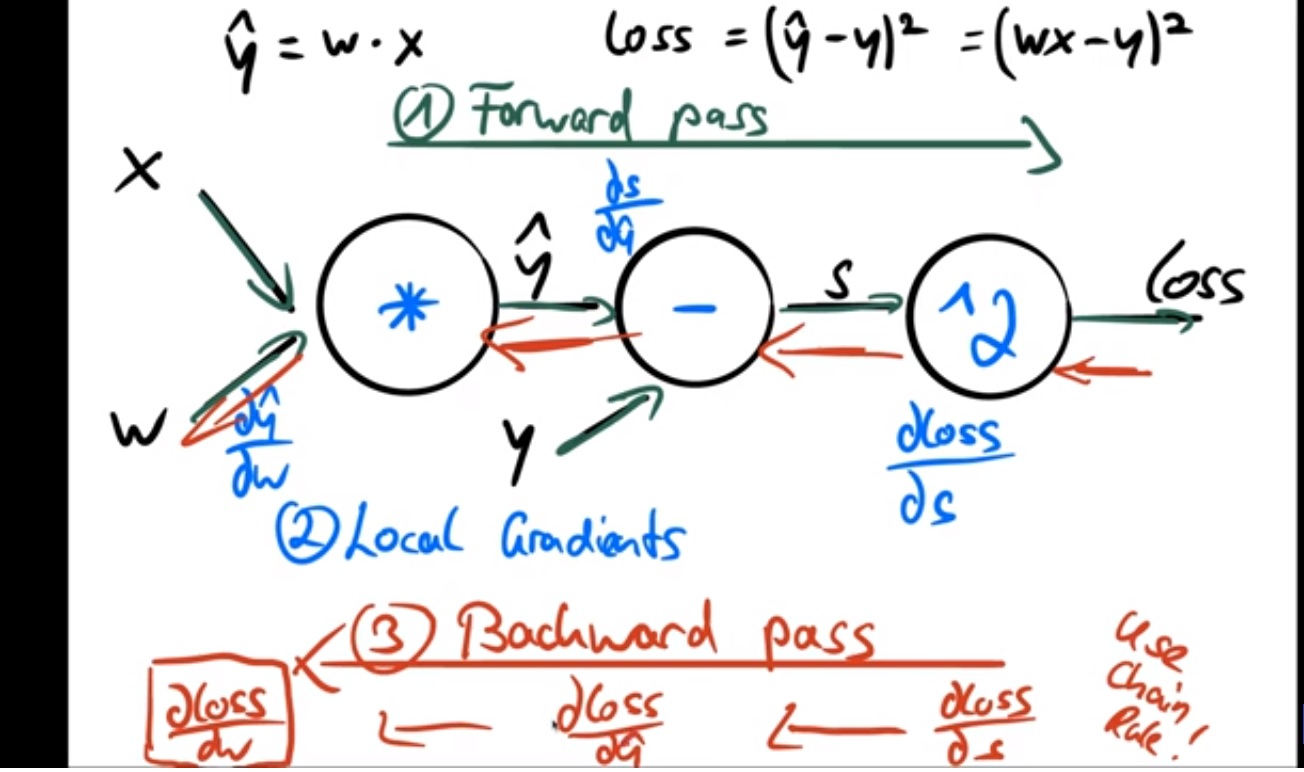


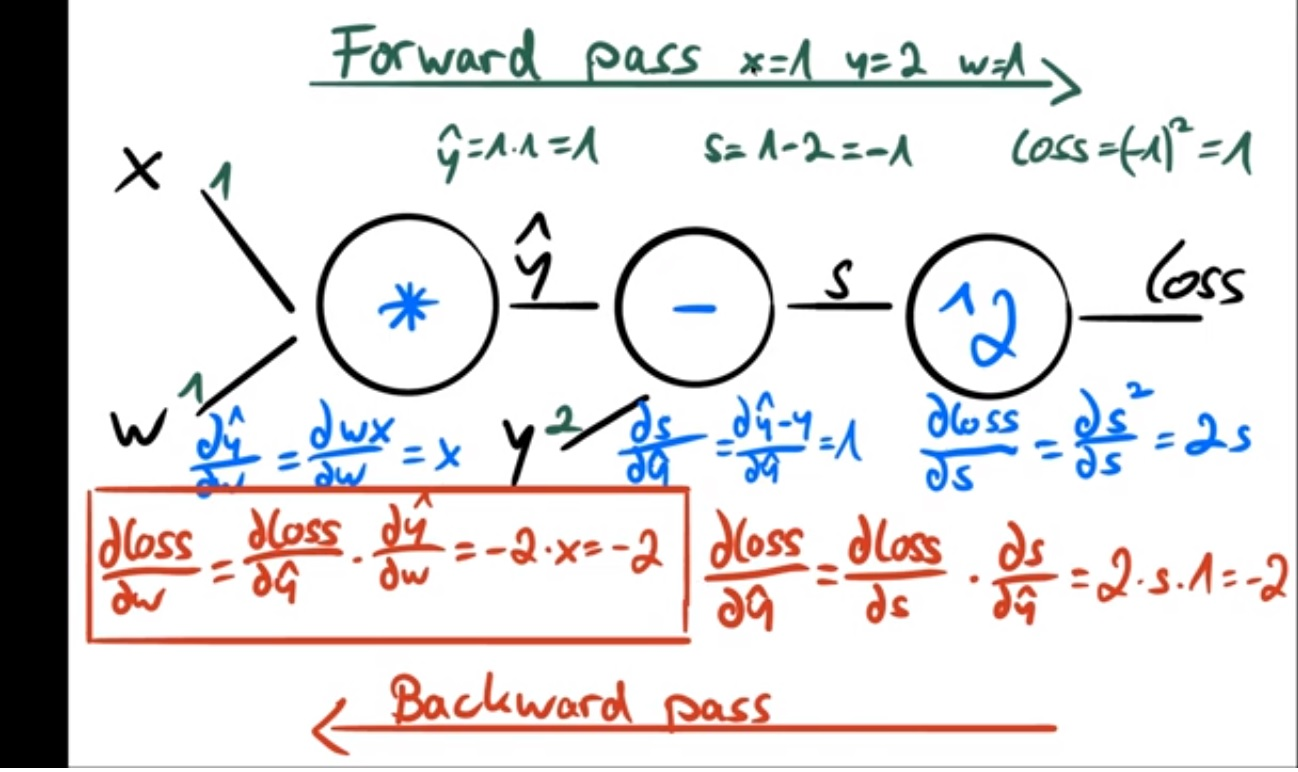





In [8]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0,requires_grad=True)

# forward pass
y_hat = w*w
loss = (y_hat - y)**2
print(loss)

#backward pass
loss.backward()
print(w.grad)   # dloss/dw

# then , update weight, then forward and backward again, repeat this iteration


tensor(1., grad_fn=<PowBackward0>)
tensor(-4.)


# Gradient Descent with Autograd and Backpropagation



In [10]:
# prediction : manual
# gradient computation : manual
# loss computation : manual
# parameters update : manual


X = np.array([1,2,3,4],dtype=np.float32)
Y = np.array([2,4,6,8],dtype=np.float32)

w = 0.0    # intializing weght parameter

def forward(x):
  return (w*x)

def loss(y,y_predicted):
  return ((y_predicted - y)**2).mean()

# gradient
# J = 1/N * (w*x - y)**2 , w*x = y_predicted
# dJ/dw = 1/N 2*x (w*x - y)
def gradient(x,y,y_predicted):
  return np.dot(2*x , y_predicted-y).mean()


#training

learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  
  y_pred = forward(X)
  l = loss(Y,y_pred)
  dw = gradient(X,Y,y_pred)

  #update weights
  w -= learning_rate * dw

  print('epoch : ',epoch,' w = ',w,' loss = ',l)

print('\n','prediction : f(5)=',forward(5))

epoch :  0  w =  1.2  loss =  30.0
epoch :  1  w =  1.6799999618530272  loss =  4.799999
epoch :  2  w =  1.871999988555908  loss =  0.7680002
epoch :  3  w =  1.9487999868392942  loss =  0.12288
epoch :  4  w =  1.9795200133323667  loss =  0.019660834
epoch :  5  w =  1.9918080282211301  loss =  0.0031457357
epoch :  6  w =  1.9967231869697568  loss =  0.000503308
epoch :  7  w =  1.99868928194046  loss =  8.053186e-05
epoch :  8  w =  1.999475698471069  loss =  1.2884395e-05
epoch :  9  w =  1.999790253639221  loss =  2.0613531e-06

 prediction : f(5)= 9.998951268196105


In [14]:
# prediction : manual
# gradient computation : autograd
# loss computation : manual
# parameters update : manual

X = torch.tensor([1,2,3,4],dtype=torch.float32)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)

w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)   # intializing weght parameter

def forward(x):
  return (w*x)

def loss(y,y_predicted):
  return ((y_predicted - y)**2).mean()


# Gradient :  no need to define gradient, pytorch will take care of it


#training

learning_rate = 0.1
n_iters = 10

for epoch in range(n_iters):
  
  y_pred = forward(X)
  l = loss(Y,y_pred)

  l.backward()
  
  #update weights
  # this part should not be part of computation graph, otherwise without < with torch.no_grad(): >
  # this error will occur : RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.
  # because we change w from a parameter and leaf into a variable which has new connections in the graph

  with torch.no_grad():  
    w -= learning_rate * w.grad

  # zero gradient
  w.grad.zero_()

  print('epoch : ',epoch,' w = ',w,' loss = ',l)

print('\n','prediction : f(5)=',forward(5))

epoch :  0  w =  tensor(3., requires_grad=True)  loss =  tensor(30., grad_fn=<MeanBackward0>)
epoch :  1  w =  tensor(1.5000, requires_grad=True)  loss =  tensor(7.5000, grad_fn=<MeanBackward0>)
epoch :  2  w =  tensor(2.2500, requires_grad=True)  loss =  tensor(1.8750, grad_fn=<MeanBackward0>)
epoch :  3  w =  tensor(1.8750, requires_grad=True)  loss =  tensor(0.4688, grad_fn=<MeanBackward0>)
epoch :  4  w =  tensor(2.0625, requires_grad=True)  loss =  tensor(0.1172, grad_fn=<MeanBackward0>)
epoch :  5  w =  tensor(1.9688, requires_grad=True)  loss =  tensor(0.0293, grad_fn=<MeanBackward0>)
epoch :  6  w =  tensor(2.0156, requires_grad=True)  loss =  tensor(0.0073, grad_fn=<MeanBackward0>)
epoch :  7  w =  tensor(1.9922, requires_grad=True)  loss =  tensor(0.0018, grad_fn=<MeanBackward0>)
epoch :  8  w =  tensor(2.0039, requires_grad=True)  loss =  tensor(0.0005, grad_fn=<MeanBackward0>)
epoch :  9  w =  tensor(1.9980, requires_grad=True)  loss =  tensor(0.0001, grad_fn=<MeanBackward0

In [33]:
# prediction : pytorch model
# gradient computation : autograd
# loss computation : pytorch loss
# parameters update : pytorch optimizer

# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights



import torch
import torch.nn as nn

# here dimension must be diffrent >> (n_samples,n_features)
X = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32) # n_samples=4 , n_features=1
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

(n_samples,n_features) = X.shape
input_size = n_features
output_size = n_features

# we dont need to define parameters , after defining the model , it will be defined by the model

model = nn.Linear(input_size,output_size)

loss = nn.MSELoss()

#training

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
n_iters = 50

for epoch in range(n_iters):
  #prediction(forward pass)
  y_pred = model(X)

  #loss
  l = loss(Y,y_pred)

  #gradient(backward pass)
  l.backward()  #dl/dw
  
  #update parameters
  optimizer.step()

  # zero gradient
  optimizer.zero_grad()

  if epoch % 5 == 0 :
    [w,b] = model.parameters()
    print('epoch : ',epoch+1,' w = ',w[0][0].item(),' loss = ',l.item())

X_test = torch.tensor([5.])
print('\n','prediction : f(5)=',model(X_test).item())  # model(): argument 'input' (position 1) must be Tensor, not int


epoch :  1  w =  3.8053393363952637  loss =  69.378173828125
epoch :  6  w =  1.733094334602356  loss =  1.2663967609405518
epoch :  11  w =  2.0162510871887207  loss =  0.023543616756796837
epoch :  16  w =  1.9807957410812378  loss =  0.0007527979905717075
epoch :  21  w =  1.987982988357544  loss =  0.0002522534050513059
epoch :  26  w =  1.989072322845459  loss =  0.00018060015281662345
epoch :  31  w =  1.9906946420669556  loss =  0.00013316128752194345
epoch :  36  w =  1.9919956922531128  loss =  9.825624874792993e-05
epoch :  41  w =  1.9931257963180542  loss =  7.250329508678988e-05
epoch :  46  w =  1.9940948486328125  loss =  5.349960702005774e-05

 prediction : f(5)= 9.989229202270508
